TextBlob performs different operations on textual data such as noun phrase extraction, sentiment analysis, classification, translation, etc.TextBlob is built on top of NLTK and Pattern also it is very easy to use and can process the text in a few lines of code. TextBlob can help you start with the NLP tasks.
Advantages and Disadvantages:
Advantages:
1. TextBlob is built on the shoulders of NLTK and Pattern, therefore it is simple for beginners by providing an intuitive interface to NLTK.
2. TextBlob provides functions such as language translation and detection which is powered by Google Translate.

Disadvantages:
1. TextBlob is little slower in the comparison to spacy but faster than NLTK. (Spacy > TextBlob > NLTK)
2. TextBlob does not provide features like dependency parsing, word vectors etc. which is provided by spacy.

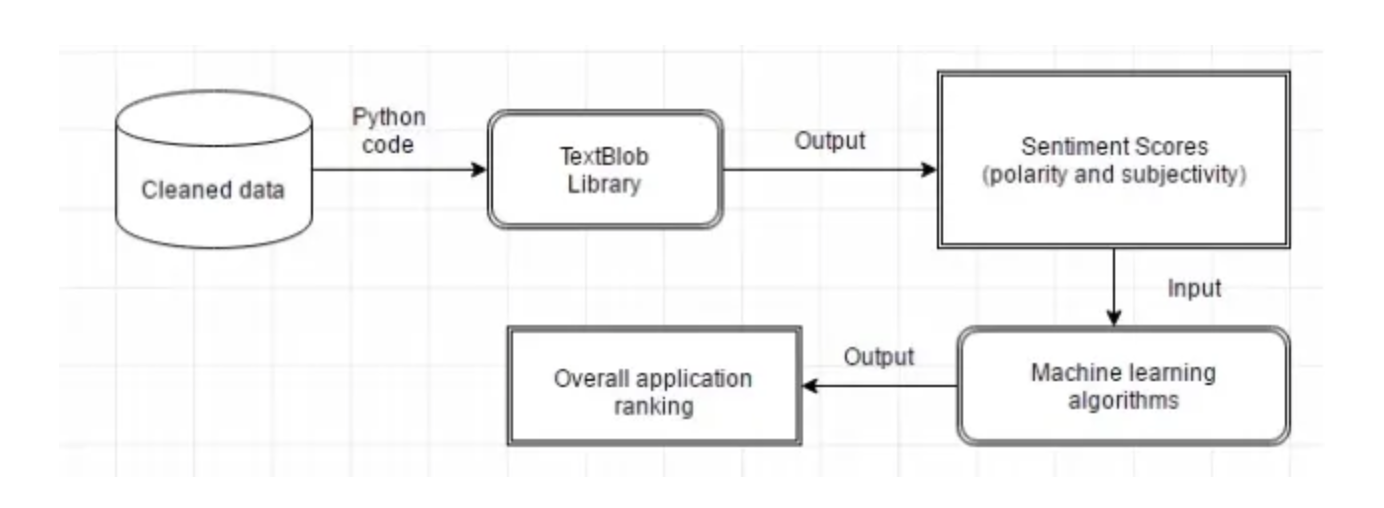



In [1]:
# !pip install textblob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation

from textblob import TextBlob
import re
import string

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\panda\Desktop\my machine learning docs\womenwear dataset\archive (2)\Womens Clothing E-Commerce Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
print(data)

       Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of c

In [7]:
data.shape

(23486, 11)

In [8]:
data['Clothing ID'].value_counts().sort_values(ascending = False)


1078    1024
862      806
1094     756
1081     582
872      545
        ... 
722        1
222        1
120        1
297        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64

<Axes: xlabel='count', ylabel='Clothing ID'>

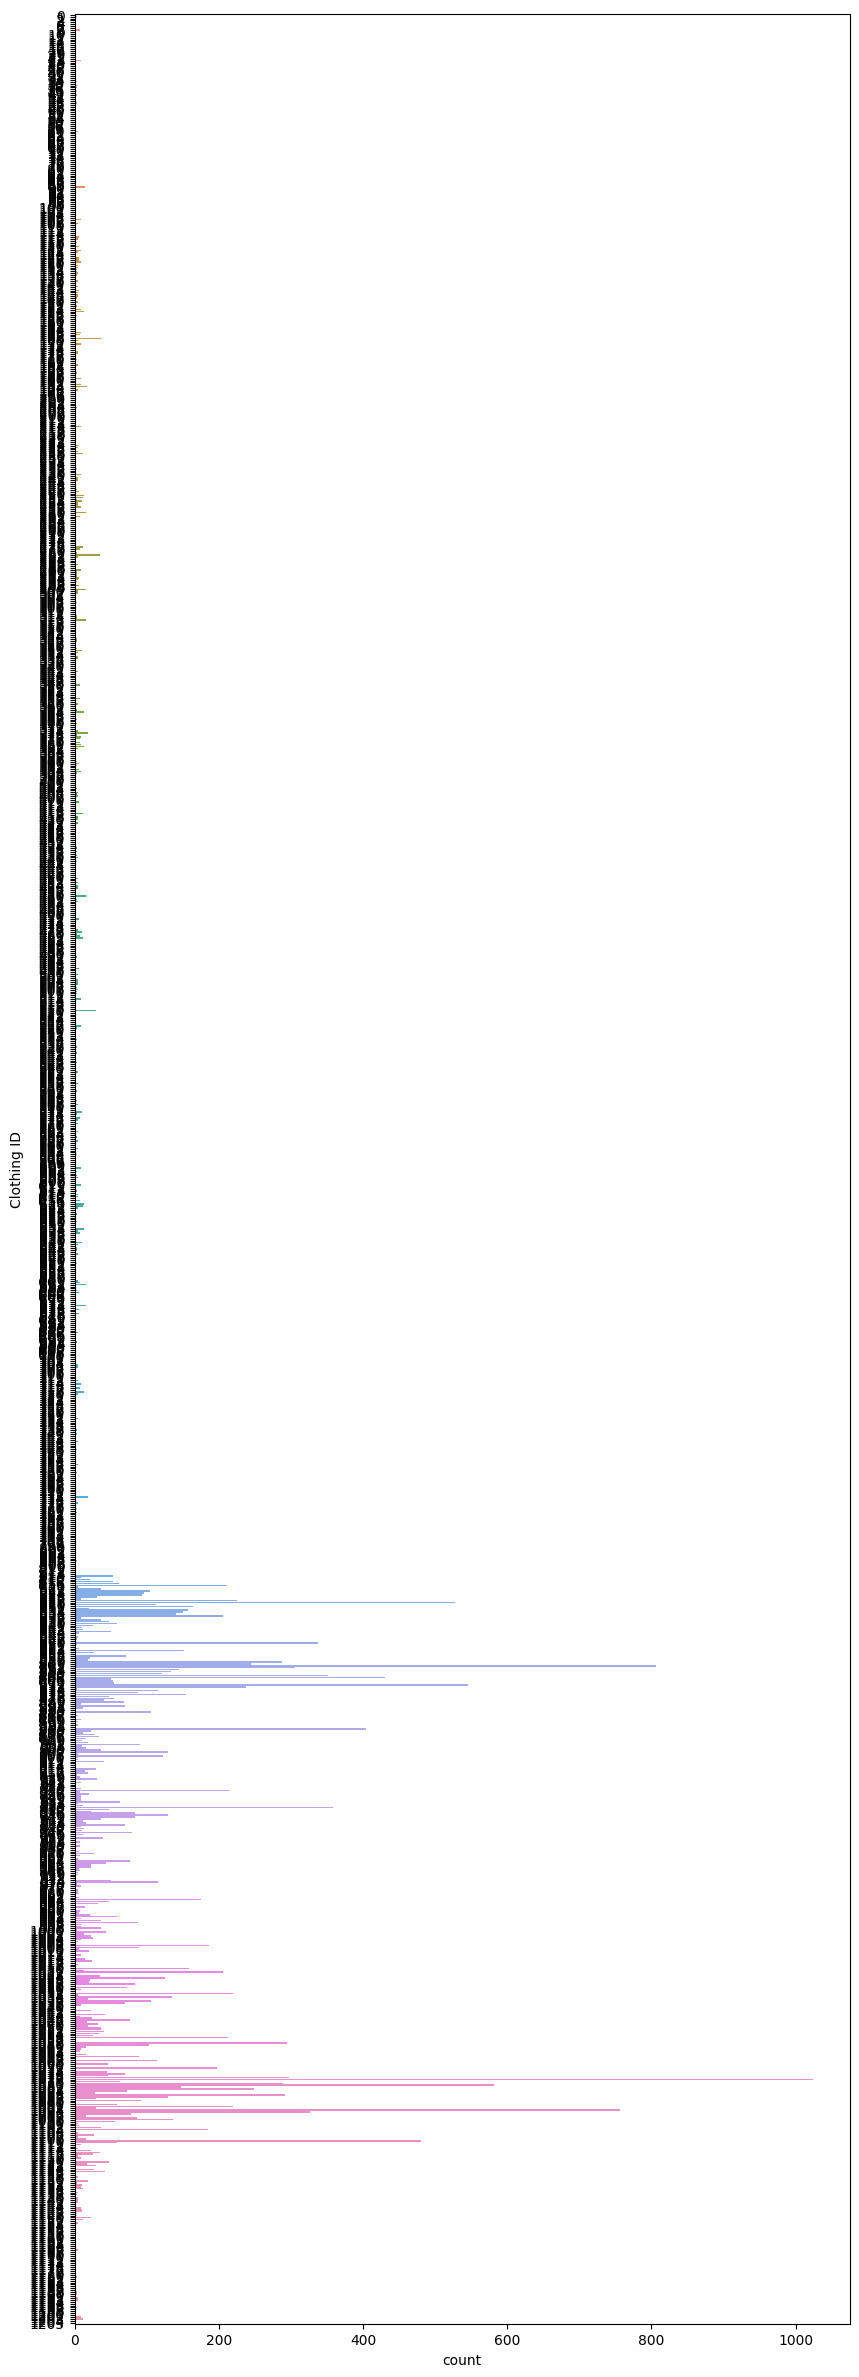

In [9]:
plt.figure(figsize = (10,30))
sns.countplot(data= data,y = 'Clothing ID')

In [10]:
division_counts= (data[['Clothing ID','Division Name']].groupby('Division Name').count())
division_counts


,Clothing ID
Division Name,
General,13850
General Petite,8120
Initmates,1502


In [11]:
df = data.drop(columns= ['Clothing ID','Unnamed: 0'])

In [12]:
df.columns = (df.columns
                .str.replace(' ', '_')
                .str.lower()
             )
print(df.columns)

Index(['age', 'title', 'review_text', 'rating', 'recommended_ind',
       'positive_feedback_count', 'division_name', 'department_name',
       'class_name'],
      dtype='object')


In [13]:
((df.isna().sum().sum())/df.shape[0])

0.1999914842885123

In [14]:
df.isna().sum(),df.shape

(age                           0
 title                      3810
 review_text                 845
 rating                        0
 recommended_ind               0
 positive_feedback_count       0
 division_name                14
 department_name              14
 class_name                   14
 dtype: int64,
 (23486, 9))

In [15]:
df.title = df.title.fillna(method = 'bfill')
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [16]:
df = df.dropna(subset=['review_text','division_name','department_name'])
df.isna().sum(),df.shape

(age                        0
 title                      0
 review_text                0
 rating                     0
 recommended_ind            0
 positive_feedback_count    0
 division_name              0
 department_name            0
 class_name                 0
 dtype: int64,
 (22628, 9))

In [17]:
df['title'].value_counts()


Love it!                           149
Beautiful                          105
Love                               100
Love!                               93
Beautiful!                          76
                                  ... 
Maybe for some...                    1
Ruffle dress                         1
Adorable, crisp top                  1
Nice design but too sheer            1
Please make more like this one!      1
Name: title, Length: 13984, dtype: int64

In [18]:
df.isnull().sum()


age                        0
title                      0
review_text                0
rating                     0
recommended_ind            0
positive_feedback_count    0
division_name              0
department_name            0
class_name                 0
dtype: int64

In [19]:
df.dtypes

age                         int64
title                      object
review_text                object
rating                      int64
recommended_ind             int64
positive_feedback_count     int64
division_name              object
department_name            object
class_name                 object
dtype: object

In [20]:
df['title'] = df['title'].astype(str)
df['review_text'] = df['review_text'].astype(str)
df['division_name'] = df['division_name'].astype(str)
df['department_name'] = df['department_name'].astype(str)
df['class_name'] = df['class_name'].astype('category')

The code provided is used to convert columns in a pandas DataFrame to the 'category' data type. This can be useful when you have columns with a limited number of unique values and you want to save memory and potentially improve performance by representing them as categorical variables. Categorical variables are stored more efficiently than regular object (string) or numeric columns.

In [21]:
df.dtypes

age                           int64
title                        object
review_text                  object
rating                        int64
recommended_ind               int64
positive_feedback_count       int64
division_name                object
department_name              object
class_name                 category
dtype: object

In [22]:
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [23]:
df['rating'].value_counts()

5    12527
4     4908
3     2823
2     1549
1      821
Name: rating, dtype: int64

In [24]:
text_blob = TextBlob("Absolutely wonderful - silky and sexy and comf")
sentiment_blob = text_blob.sentiment

# Access TextBlob sentiment scores
polarity_blob = sentiment_blob.polarity
subjectivity_blob = sentiment_blob.subjectivity
print(sentiment_blob)

print("TextBlob Polarity:", polarity_blob)
print("TextBlob Subjectivity:", subjectivity_blob)

Sentiment(polarity=0.75, subjectivity=1.0)
TextBlob Polarity: 0.75
TextBlob Subjectivity: 1.0


In [25]:
def polarity(x):
    text_blob = TextBlob(x)
    sentiment_blob = text_blob.sentiment
    polarity_blob = round(text_blob.polarity,2)
    return polarity_blob
    

In [26]:
df['review_text_polarity'] = df['review_text'].apply(polarity)


In [27]:
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,review_text_polarity
0,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.63
1,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.34
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.07
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.55
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.51
...,...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.55
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.09
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.41
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.32


In [28]:
df.review_text_polarity.min()

-0.98

In [29]:
df.review_text_polarity.max()

1.0

In [30]:
def spelling(x):
    text = TextBlob(x)
    return str(text.correct())

In [31]:
# from collections import Counter
# text = ' '.join(df['review_text'])
# blob = TextBlob(text)

# word_frequencies = Counter(blob.words)
# print("Word Frequencies:")
# word_frequencies.head


In [32]:
def pol(x):
    
    if x > 0.5:
        return('1')
    else:
        return('0')

In [33]:
df['sentiment'] = df['review_text_polarity'].apply(pol)
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,review_text_polarity,sentiment
0,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.63,1
1,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.34,0
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.07,0
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.55,1
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.51,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.55,1
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.09,0
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.41,0
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.32,0


<Axes: xlabel='sentiment', ylabel='count'>

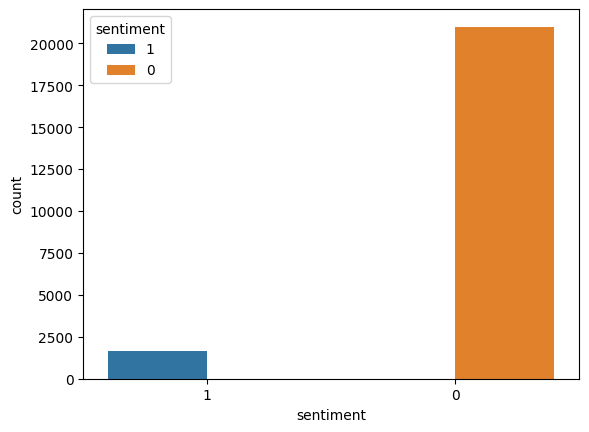

In [34]:
sns.countplot(data = df, x = 'sentiment',hue = 'sentiment')

In [35]:
def sentiment_rating(x):
    if x>3:
        return('1')
    else:
        return('0')

In [36]:
df['rating_based_sentiment'] = df['rating'].apply(sentiment_rating)
df.head()

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,review_text_polarity,sentiment,rating_based_sentiment
0,33,Some major design flaws,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.63,1,1
1,34,Some major design flaws,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.34,0,1
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.07,0,0
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.55,1,1
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.51,1,1


<Axes: xlabel='rating_based_sentiment', ylabel='count'>

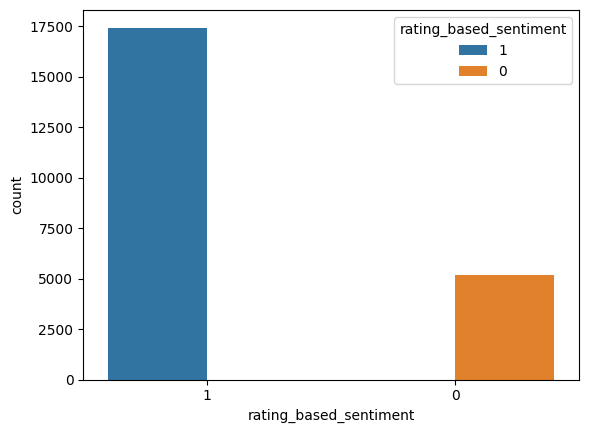

In [37]:
sns.countplot(data = df, x = 'rating_based_sentiment',hue = 'rating_based_sentiment')

In [38]:
nltk.download('stopwords')
nltk.download('punkt')
def clean_data(x):
    blob = TextBlob(x)
    words = blob.words  # split sentences into words
    stop_words = set(stopwords.words('english'))
    clean_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]
    clean_text = ' '.join(clean_words)
#     clean_text = re.sub(r'[^a-zA-Z0-9\s]','',clean_text)
    return clean_text
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
clean_data('One day I will be the great datas!!!!cientist!!!!!, I am sure')

'one day great datas cientist sure'

In [40]:
# stopwords.words('english')

In [41]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended_ind',
       'positive_feedback_count', 'division_name', 'department_name',
       'class_name', 'review_text_polarity', 'sentiment',
       'rating_based_sentiment'],
      dtype='object')

In [42]:
df['review_text'] = df['review_text'].apply(clean_data)
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,review_text_polarity,sentiment,rating_based_sentiment
0,33,Some major design flaws,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63,1,1
1,34,Some major design flaws,love dress 's sooo pretty happened find store ...,5,1,4,General,Dresses,Dresses,0.34,0,1
2,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses,0.07,0,0
3,50,My favorite buy!,love love love jumpsuit 's fun flirty fabulous...,5,1,0,General Petite,Bottoms,Pants,0.55,1,1
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.51,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,happy snag dress great price 's easy slip flat...,5,1,0,General Petite,Dresses,Dresses,0.55,1,1
23482,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits,0.09,0,0
23483,31,"Cute, but see through",fit well top see never would worked 'm glad ab...,3,0,1,General Petite,Dresses,Dresses,0.41,0,0
23484,28,"Very cute dress, perfect for summer parties an...",bought dress wedding summer 's cute unfortunat...,3,1,2,General,Dresses,Dresses,0.32,0,0


In [43]:
df['review_text']

0              absolutely wonderful silky sexy comfortable
1        love dress 's sooo pretty happened find store ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit 's fun flirty fabulous...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price 's easy slip flat...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked 'm glad ab...
23484    bought dress wedding summer 's cute unfortunat...
23485    dress lovely platinum feminine fits perfectly ...
Name: review_text, Length: 22628, dtype: object

In [44]:
def lemma(x):
    blob = TextBlob(x)
    words = blob.words # splitting the data
    lemmatized_words = [word.lemmatize() for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [45]:
df['lemma_review_text'] = df['review_text'].apply(lemma)
df

,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name,review_text_polarity,sentiment,rating_based_sentiment,lemma_review_text
0,33,Some major design flaws,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.63,1,1,absolutely wonderful silky sexy comfortable
1,34,Some major design flaws,love dress 's sooo pretty happened find store ...,5,1,4,General,Dresses,Dresses,0.34,0,1,love dress 's sooo pretty happened find store ...
2,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses,0.07,0,0,high hope dress really wanted work initially o...
3,50,My favorite buy!,love love love jumpsuit 's fun flirty fabulous...,5,1,0,General Petite,Bottoms,Pants,0.55,1,1,love love love jumpsuit 's fun flirty fabulous...
4,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,0.51,1,1,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,Great dress for many occasions,happy snag dress great price 's easy slip flat...,5,1,0,General Petite,Dresses,Dresses,0.55,1,1,happy snag dress great price 's easy slip flat...
23482,48,Wish it was made of cotton,reminds maternity clothes soft stretchy shiny ...,3,1,0,General Petite,Tops,Knits,0.09,0,0,reminds maternity clothes soft stretchy shiny ...
23483,31,"Cute, but see through",fit well top see never would worked 'm glad ab...,3,0,1,General Petite,Dresses,Dresses,0.41,0,0,fit well top see never would worked 'm glad ab...
23484,28,"Very cute dress, perfect for summer parties an...",bought dress wedding summer 's cute unfortunat...,3,1,2,General,Dresses,Dresses,0.32,0,0,bought dress wedding summer 's cute unfortunat...


In [46]:
x = df['lemma_review_text']
y = df['rating_based_sentiment']

In [47]:
# Storing positive data seperately
positive = df[df['rating_based_sentiment'] == '1']
positive_list = positive['lemma_review_text'].tolist()
positive_text = ' '.join(positive_list)


# Storing negative data seperately

negative = df[df['rating_based_sentiment'] == '0']
negative_list = negative['lemma_review_text'].tolist()
negative_text = ' '.join(negative_list)

In [48]:
negative_text

"high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite 5 foot tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back nice choice holiday gathering like length graz knee conservative enough office related gathering size small fit well usually size 2/4 small bust opinion run small larger bust definitely size perhaps waist big problem dress quality fabri

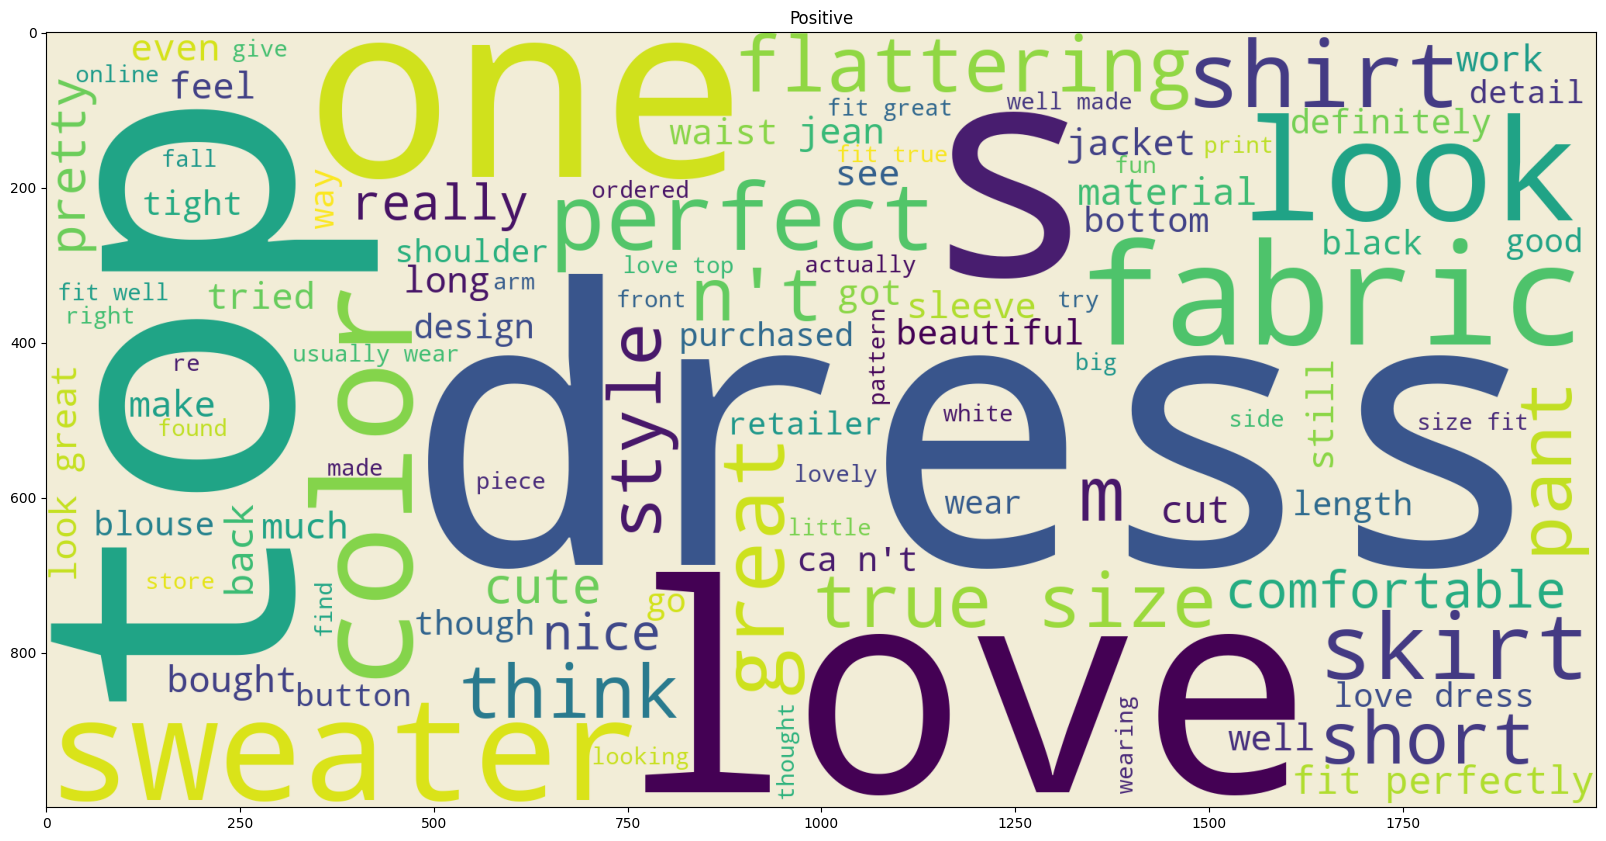

In [49]:

from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_text)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

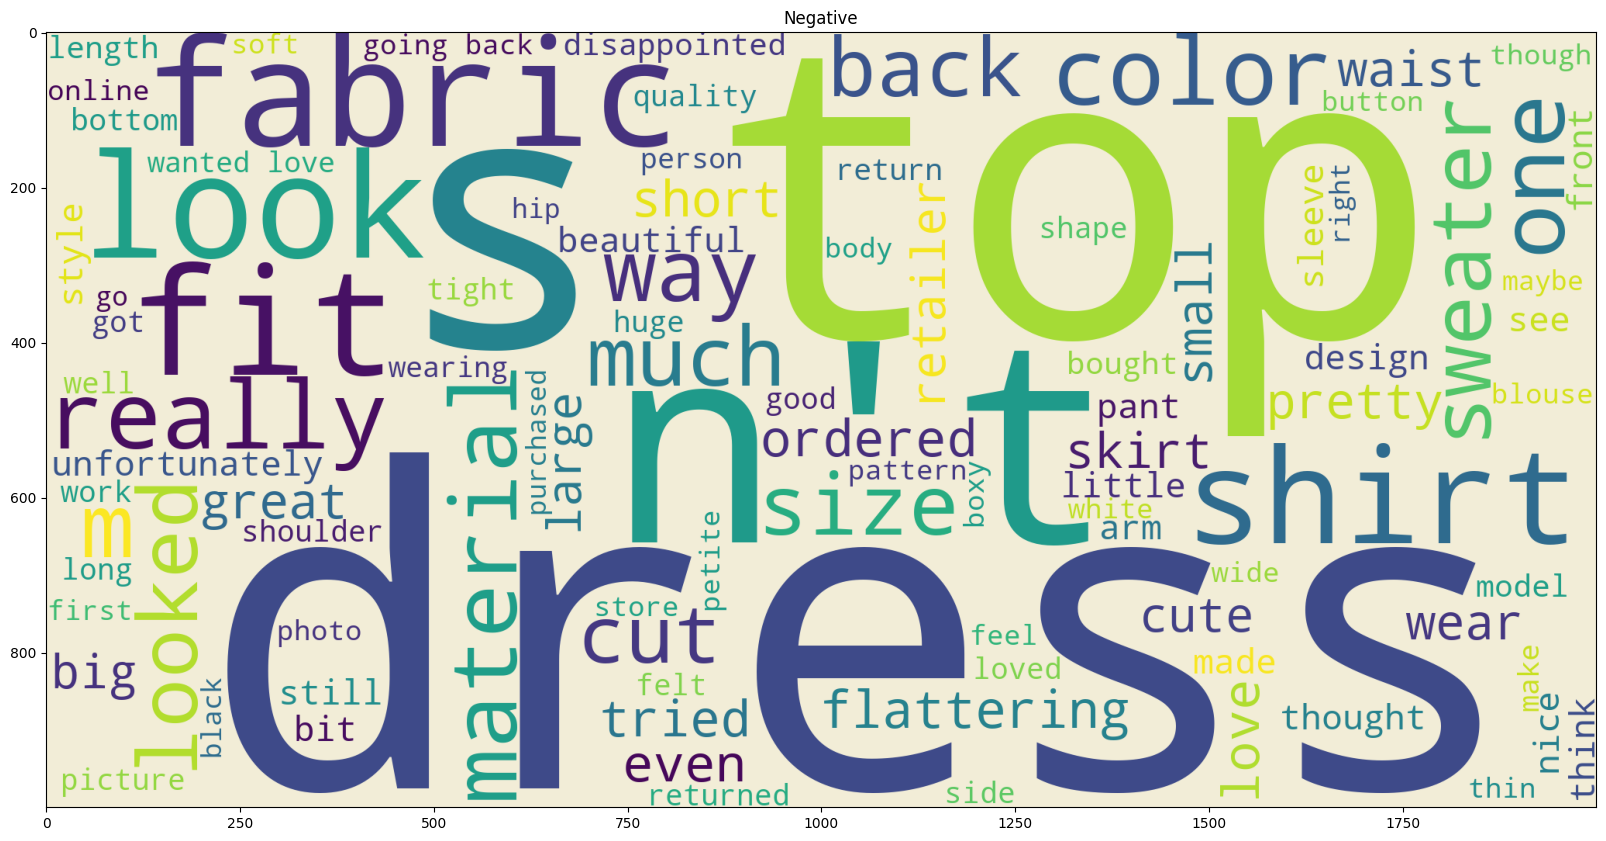

In [50]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_text)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Negative")
plt.show()

In [51]:
!pip install wordcloud

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state= 30)
x_train.shape,x_test.shape

((15839,), (6789,))

In [53]:
x_train

1285     beauty arrived store today despite gal telling...
6117     bought top small true size loved n't fitted ac...
6178     tried whim last week even though bit budget co...
442      nice tee true red,3/4 sleeve lacing nice touch...
2294     dress become favorite rotation cut print flatt...
                               ...                        
520      first saw jacket hanging store n't look cute s...
12527    top comfortable wear way hang make light air w...
15868    bought dress work receive ton compliment wear ...
4686     top beautiful look fit like model tight across...
6146     n't think much tank perusing sale item website...
Name: lemma_review_text, Length: 15839, dtype: object

In [54]:
cv_vectorizer = CountVectorizer(ngram_range=(1,3))
x_train_vector = cv_vectorizer.fit_transform(x_train)
x_test_vector = cv_vectorizer.transform(x_test)




In [55]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_vector,y_train)
y_pred_lg = lg.predict(x_test_vector)


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1556
           1       0.90      0.95      0.92      5233

    accuracy                           0.88      6789
   macro avg       0.84      0.80      0.82      6789
weighted avg       0.88      0.88      0.88      6789



In [57]:
x_input = ['The product is very nice fit is proper the quality is very good']
x_test_sample = cv_vectorizer.transform(x_input)
lg.predict(x_test_sample)

array(['1'], dtype=object)